# N.2 : Histogramme des niveaux de gris d'images

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### II. Algorithme

Ecrivez l’algorithme du calcul de l’histogramme des niveaux de gris d’une image de taille NLxNC et de 256 niveaux de gris entre 0 (noir) et 255 (blanc).

In [2]:
def compute_hist(img):
    """
    Parameter
    ---------
    img : Numpy Array (HxW)
    Returns
    -------
    output: Numpy Array
        256d-array where the ith element corresponds to
        the number of pixels.
    """
    output = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[int(img[i][j])] += 1
    
    return output

### III. Programmation

**1.** Ecrivez le programme qui calcule et visualise l’histogramme d’un carré blanc (255) de taille 50x50 sur un fond noir (0) de taille 100x100.

* Quelles sont vos observations ?

(tracer une courbe en testant trois fonctions différentes: plot(x,y), stem(), bar()).

<ipython-input-3-418c4f4021fb>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem(np.array([i for i in range(256)]), hist)


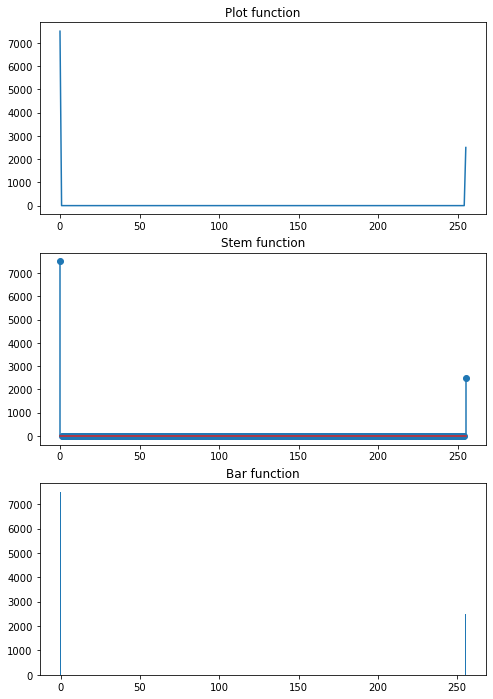

In [3]:
# initializes image
img = np.zeros((100,100))
img[25:75, 25:75] = 255
# computes histogram
hist = compute_hist(img)
# displays histogram
fig, axs = plt.subplots(3, figsize=(8, 12))
axs[0].set_title("Plot function")
axs[0].plot(np.array([i for i in range(256)]), hist)
axs[1].set_title("Stem function")
axs[1].stem(np.array([i for i in range(256)]), hist)
axs[2].set_title("Bar function")
axs[2].bar(np.array([i for i in range(256)]), hist)
plt.show()

**2.** Ecrivez le programme qui lit l’image dans le fichier ‘pouttif.jpg’ et calcule l’histogramme de cette image.

* Quelles sont vos observations ?
* Quelle est l’idée d’amélioration de la qualité visuelle de cette image ?

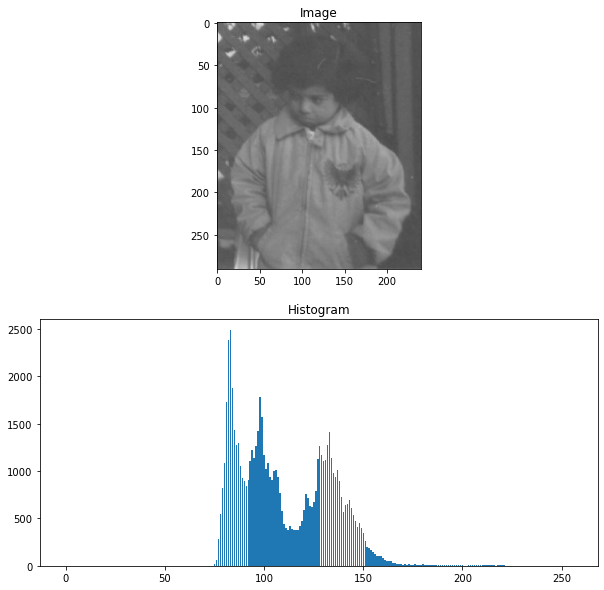

In [4]:
# loads image
img = cv2.imread("./data/pouttif.jpg")
# computes histogram
hist = compute_hist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
# displays image and histogram
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].set_title("Image")
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title("Histogram")
axs[1].bar(np.array([i for i in range(256)]), hist)
plt.show()

**Réponse**

* On constate que l'histogramme de l'image n'est pas équilibré, en effet les niveaux de gris les plus présents dans l'image sont très similaires.

* On peut essayer d'étirer la distribution des niveaux de gris et ensuite d'uniformiser nos niveaux de gris.

*Rappel:*

* Formule d'étirement : $\frac{I_{i, j}-I_{min}}{I_{max}-I_{min}} \times 255$
* Formule d'uniformisation : $f(x) = \frac{255}{N_{pixels}} \times \sum^{x}_{n=0} H(n)$